#### import libraries


In [73]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Merging all months sales data into one

In [10]:
os.chdir("E:\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")

In [12]:
csv_files = [file for file in os.listdir() if file.endswith(".csv")]

In [17]:
merged_file = pd.DataFrame()
for file in csv_files:
    df = pd.read_csv(str(file))
    merged_file = pd.concat([merged_file,df])

In [20]:
merged_file.to_csv("all_data.csv", index = False)

In [21]:
all_data= pd.read_csv("all_data.csv")

#### finding best month for sales and how much that month earn

In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Drop Na values 

In [43]:
all_data = all_data.dropna(how="all")

In [44]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [52]:
#this will filter out Or error i am getting later
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


In [36]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [53]:
all_data['Month'] =all_data['Month'].astype(int)

In [68]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [65]:
all_data['Quantity Ordered'] =pd.to_numeric(all_data['Quantity Ordered'])

In [69]:
all_data['Total Price']= all_data['Price Each'] * all_data['Quantity Ordered']

In [70]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price
0,176558,USB-C Charging Cable,2.0,11,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,22.0
2,176559,Bose SoundSport Headphones,1.0,99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.0
3,176560,Google Phone,1.0,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0
4,176560,Wired Headphones,1.0,11,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.0
5,176561,Wired Headphones,1.0,11,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.0


In [76]:
grouped_df = all_data.groupby('Month').sum().reset_index()

In [77]:
grouped_df.head()

,Month,Quantity Ordered,Price Each,Total Price
0,1,10903.0,1804577,1813956.0
1,2,13449.0,2179934,2191696.0
2,3,17005.0,2779903,2794068.0
3,4,20558.0,3354065,3374951.0
4,5,18667.0,3122775,3138287.0


#### Visualize patterns months vs sales


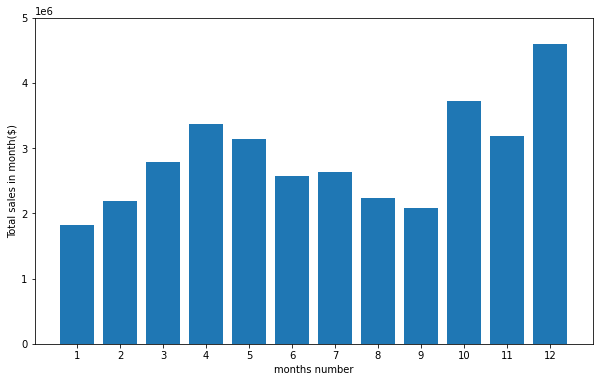

In [85]:
months =range(1,13)
plt.figure(figsize=(10, 6))
plt.bar(months, grouped_df['Total Price'])
plt.xticks(months)
plt.ylim(0,5000000)
plt.xlabel("months number")
plt.ylabel("Total sales in month($)")
plt.show()

This shows that december is the highest sale and as this company is located in US So i think its easy to predict that december is the month of christmas as its one big for celebration and every one buying gifts for another 


### finding cities who buy max products


In [98]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,176558,USB-C Charging Cable,2.0,11,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,22.0,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.0,Boston (MA)
3,176560,Google Phone,1.0,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA)
4,176560,Wired Headphones,1.0,11,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.0,Los Angeles (CA)
5,176561,Wired Headphones,1.0,11,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.0,Los Angeles (CA)


In [99]:
grouped1_df = all_data.groupby('City').sum().reset_index()

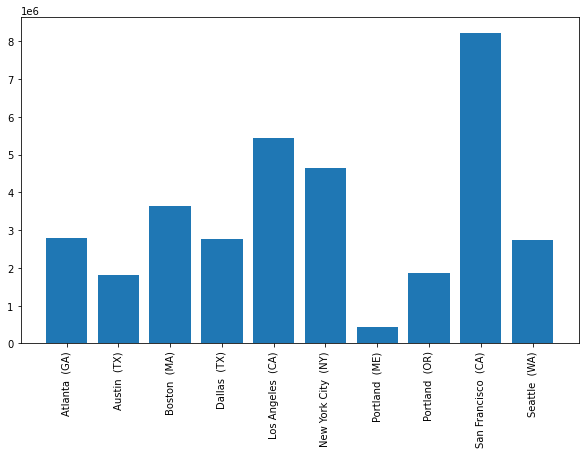

In [101]:
plt.figure(figsize=(10, 6))
plt.bar(grouped1_df['City'],grouped1_df['Total Price'])
plt.xticks(grouped1_df['City'], rotation=90)
plt.show()

So San Francisco have huge amount of sales and portland(ME) have less sales compare to other cities it may be cause by many reasons like maybe ads time in portland is not appropriate 

#### now  i am going to find sales quantity versus time(24)  and may find which is the best time to get some adds to improve the buisness

In [113]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [104]:
all_data['Hour'] = all_data['Order Date'].dt.hour

In [106]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Hour
0,176558,USB-C Charging Cable,2.0,11,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,22.0,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1.0,99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.0,Boston (MA),22
3,176560,Google Phone,1.0,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA),14
4,176560,Wired Headphones,1.0,11,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.0,Los Angeles (CA),14
5,176561,Wired Headphones,1.0,11,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.0,Los Angeles (CA),9


In [108]:
grouped2_df = all_data.groupby('Hour').count().reset_index()

In [109]:
grouped2_df.head()

,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,3,831,831,831,831,831,831,831,831,831
4,4,854,854,854,854,854,854,854,854,854


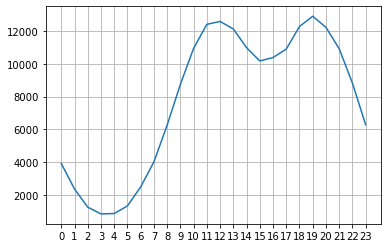

In [112]:
plt.plot(grouped2_df['Hour'],grouped2_df['Quantity Ordered'] )
plt.xticks(grouped2_df['Hour'])
plt.grid()
plt.show()

this shows time between 11:00 am to 13:00 pm and time between 18:00 Pm to 20:00 pm is peak time so it should be the time to increase ads 

Now i want to see how often product sold together to see if i can make some offer with product

In [134]:
df = all_data[all_data['Order ID'].duplicated(keep =False)]
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df.head(20)


<ipython-input-134-9edbea16f1a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Hour,grouped
3,176560,Google Phone,1.0,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.0,Los Angeles (CA),14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.0,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.0,Boston (MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1.0,99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.0,Boston (MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2.0,2,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,4.0,San Francisco (CA),17,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1.0,600,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.0,San Francisco (CA),17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1.0,14,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.0,New York City (NY),11,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1.0,11,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.0,New York City (NY),11,"Lightning Charging Cable,USB-C Charging Cable"


In [136]:
df= df[['Order ID','grouped']].drop_duplicates()
df.head()

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [138]:
#i got this code from stack overflow basically it gives us the combination count of products which bought in groups 


from itertools import combinations
from collections import Counter

count = Counter()

for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


what we can do with this insight is that we can promote another product which were in these combinations to customer in strategic way cause we know people usually buy the products 

#### Now i am gonna take a look which products solds the most and why 

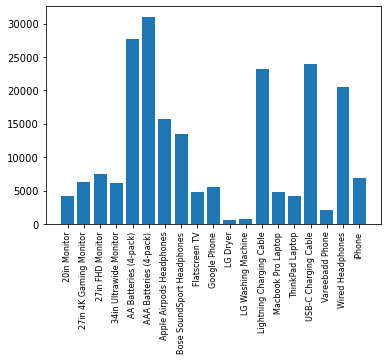

In [139]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-140-47066c2f195f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-140-47066c2f195f>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


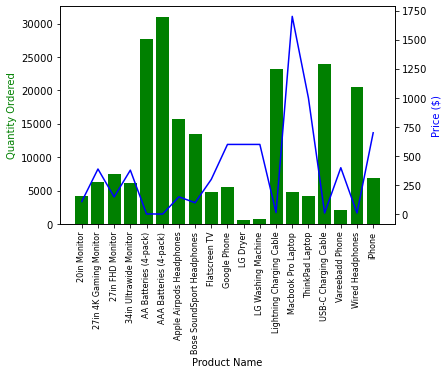

In [140]:
#i got this from stackflow on how i can add 2 y axis labels in one graph

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

This data shows products which are sold the most is cheap and like batteries but laptops are very expensive and also have a good no of sold products 

i think most products sold are batteries and most profitable products are laptops